In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
df = pd.read_csv('loan_dataset.csv')

In [67]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


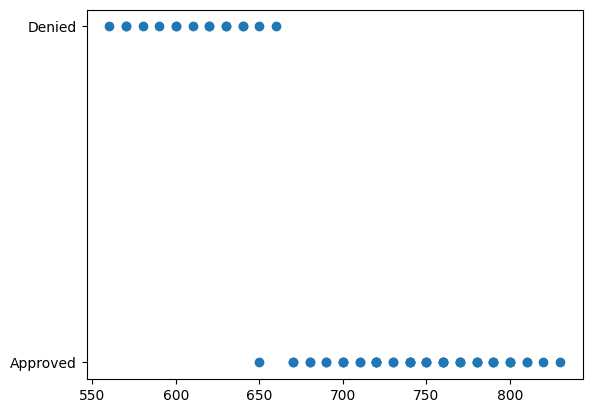

In [68]:
plt.scatter(df['credit_score'], df['loan_status'])

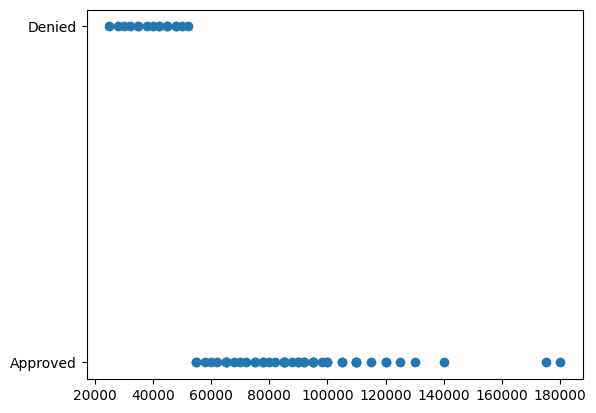

In [69]:
plt.scatter(df['income'], df['loan_status'])

1. convert loan_status to binary
2. normalizing the data scince it has really big values

In [70]:
def sigmoid(x):
    # print(1 + np.exp(-x))
    return 1 / (1 + np.exp(-x))

def logistic_func(theta, x):
    # print(x)
    # print(np.dot(x, theta))
    return sigmoid(np.dot(x, theta))

def cost_func(theta, x, y):
    # Logistic regression cost function
    m = x.shape[0]
    logistic = logistic_func(theta, x)
    cost = -(1/m) * np.sum(y * np.log(logistic + 1e-9) + (1 - y) * np.log(1 - logistic + 1e-9))
    return cost

def gradient(theta, x, y):
    m = x.shape[0]
    # print(r)
    return (1/m) *  np.dot(x.T,  logistic_func(theta, x) - y)

def fit(x, y, alpha=0.1, max_iter=200, eps=1e-6):
    x = np.insert(x, 0, 1, axis=1)
    # theta = np.zeros(x.shape[1])
    # theta = np.random.rand(x.shape[1]) * 0.01
    theta = np.array([0.3,0.4,0.0])
    cost_history = []

    for _ in range(max_iter):
        grad = gradient(theta, x, y)
        theta -= alpha * grad
        new_cost = cost_func(theta, x, y)
        cost_history.append(new_cost)
        print(_, "grad ",grad)
        print(theta)

    return theta, cost_history

def predict(x, theta):
    x = np.insert(x, 0, 1, axis=1)
    return logistic_func(theta, x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)

In [71]:
df['loan_status_b'] = df['loan_status'].apply(lambda x: 0 if x == 'Denied' else 1)
df['credit_score_n'] = (df['credit_score'] - df['credit_score'].min()) / (df['credit_score'].max() - df['credit_score'].min())
df['income_n'] = (df['income'] - df['income'].min()) / (df['income'].max() - df['income'].min())


## Logistic regresstion
1. using the credit score and income as features
2. Converting data to binary

using the credit score and income as features

In [72]:
x = df[['credit_score_n', 'income_n']].values
y = df['loan_status_b'].values

test train split

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

0 grad  [-0.14024445 -0.16619012 -0.1092546 ]
[0.44024445 0.56619012 0.1092546 ]
1 grad  [-0.07882753 -0.12682831 -0.08418284]
[0.51907199 0.69301843 0.19343745]
2 grad  [-0.04194841 -0.10312723 -0.06909942]
[0.5610204  0.79614566 0.26253687]
3 grad  [-0.01843854 -0.08787245 -0.05938841]
[0.57945895 0.88401811 0.32192528]
4 grad  [-0.00273736 -0.07750086 -0.05277526]
[0.58219631 0.96151898 0.37470053]
[0.58219631 0.96151898 0.37470053]


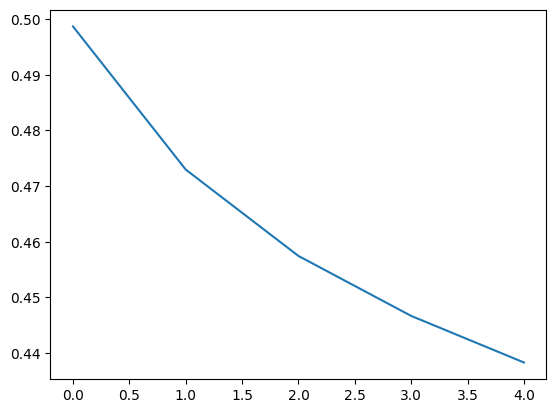

In [74]:
theta, history = fit(x_train, y_train, alpha=1, max_iter=5)

print(theta)

plt.plot(history)

In [75]:
y_pred = predict(x_test, theta)

y_pred = np.round(y_pred)
print(y_pred)

accuracy = np.mean(y_pred == y_test)
print("accuracy : ", accuracy)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
accuracy :  0.6153846153846154


## Multi Class Classification
1. using the credit score and income as features
2. Loan class prediction (Multi-class prediction, A/B/C): Credit Score > 750 = A, Credit Score > 650 and < 750 = B, Credit Score < 650 = C category. 
3. prepare the target variable

4. one hot encoding the target variable do one hot encoding without using any library
    - y0 is 1 for A, 0 for B and 0 for C
    - y1 is 0 for A, 1 for B and 0 for C
    - y2 is 0 for A, 0 for B and 1 for C


In [76]:
x = df[['credit_score_n', 'income_n']].values
y_cat = df['credit_score'].apply(lambda x: 'A' if x > 750 else 'B' if x > 650 else 'C').values

y = np.zeros((y_cat.size, 3))
for i in range(y_cat.size):
    if y_cat[i] == 'A':
        y[i, 0] = 1
    elif y_cat[i] == 'B':
        y[i, 1] = 1
    else:
        y[i, 2] = 1

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

0 grad  [0.27349149 0.05917487 0.01909948]
[ 0.02650851  0.34082513 -0.01909948]
1 grad  [ 0.19812497  0.01597444 -0.00863297]
[-0.17161647  0.32485069 -0.01046651]
2 grad  [ 0.14742886 -0.01251123 -0.02681586]
[-0.31904532  0.33736192  0.01634936]
3 grad  [ 0.11483486 -0.03012531 -0.03793215]
[-0.43388018  0.36748723  0.0542815 ]
4 grad  [ 0.0939728  -0.04069571 -0.04447035]
[-0.52785299  0.40818294  0.09875185]
[-0.52785299  0.40818294  0.09875185]
0 grad  [0.27349149 0.15253907 0.11143819]
[ 0.02650851  0.24746093 -0.11143819]
1 grad  [0.17706309 0.09435437 0.07357529]
[-0.15055458  0.15310657 -0.18501348]
2 grad  [0.11313774 0.05561255 0.04833426]
[-0.26369232  0.09749402 -0.23334774]
3 grad  [0.07324523 0.03149552 0.03263332]
[-0.33693755  0.06599851 -0.26598106]
4 grad  [0.04839466 0.0165452  0.0229114 ]
[-0.38533221  0.0494533  -0.28889246]
[-0.38533221  0.0494533  -0.28889246]
0 grad  [0.33599149 0.30454524 0.20189518]
[-0.03599149  0.09545476 -0.20189518]
1 grad  [0.19466561 0

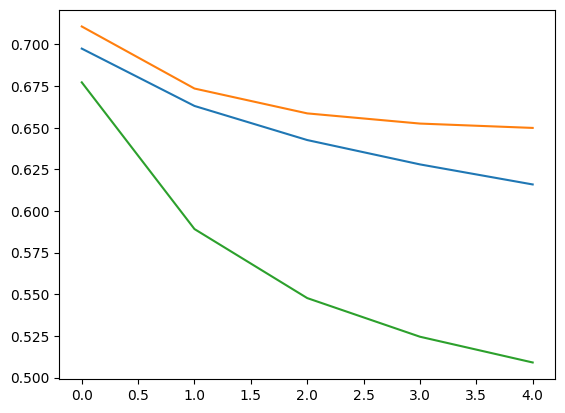

In [78]:
theta_1, history = fit(x_train, y_train[:, 0], alpha=1, max_iter=5)
print(theta_1)
plt.plot(history)

theta_2, history = fit(x_train, y_train[:, 1], alpha=1, max_iter=5)
print(theta_2)
plt.plot(history)

theta_3, history = fit(x_train, y_train[:, 2], alpha=1, max_iter=5)
print(theta_3)
plt.plot(history)

In [79]:
y_pred_0 = predict(x_test, theta_1)
y_pred_1 = predict(x_test, theta_2)
y_pred_2 = predict(x_test, theta_3)

y_pred =  np.round(np.array([y_pred_0, y_pred_1, y_pred_2]).T)

accuracy = np.mean(y_pred[0] == y_test[0])
print("Class A : ",accuracy)

accuracy = np.mean(y_pred[1] == y_test[1])
print("Class B : ",accuracy)

accuracy = np.mean(y_pred[2] == y_test[2])
print("Class C : ",accuracy)

Class A :  0.6666666666666666
Class B :  0.6666666666666666
Class C :  0.6666666666666666


## Multi Label Classification
using softmax at the end of the above multi class classification

In [80]:
y_pred_0 = predict(x_test, theta_1)
y_pred_1 = predict(x_test, theta_2)
y_pred_2 = predict(x_test, theta_3)

y_pred =  np.array([y_pred_0, y_pred_1, y_pred_2]).T
y_pred = softmax(y_pred)

y_pred = np.argmax(y_pred, axis=1)


In [81]:
for i in range(y_pred.size):
    print("pred : ",y_pred[i],"test : ", np.argmax(y_test[i]), y_pred[i] == np.argmax(y_test[i]))

pred :  0 test :  0 True
pred :  0 test :  1 False
pred :  1 test :  2 False
pred :  0 test :  1 False
pred :  0 test :  1 False
pred :  0 test :  1 False
pred :  0 test :  0 True
pred :  0 test :  1 False
pred :  0 test :  1 False
pred :  0 test :  1 False
pred :  0 test :  2 False
pred :  0 test :  1 False
pred :  0 test :  0 True
